# Demonstration: QCNN algorithm

In [7]:
import pennylane as qml
from pennylane import numpy as np
import jax
import jax.numpy as jnp
from jax import jit

from matplotlib import pyplot as plt

import copy
import tqdm  # Pretty progress bars

import sys
sys.path.insert(0, '../')
import vqe as vqe
import qcnn as qcnn
import losses as losses
import visualization as qplt
##############

In [2]:
myqcnn = qcnn.qcnn(vqe.load_vqe('../data/vqe_isingchain.pkl'), qcnn.qcnn_circuit)

In [3]:
train_index = np.random.choice(np.arange(len(myqcnn.vqe_states)), 30, replace = False)

In [4]:
myqcnn.train(0.25, 2000, train_index, losses.cross_entropy, circuit=False, plot=False)

Cost: 0.15716378390789032: 100%|███████████| 2000/2000 [00:18<00:00, 110.85it/s]


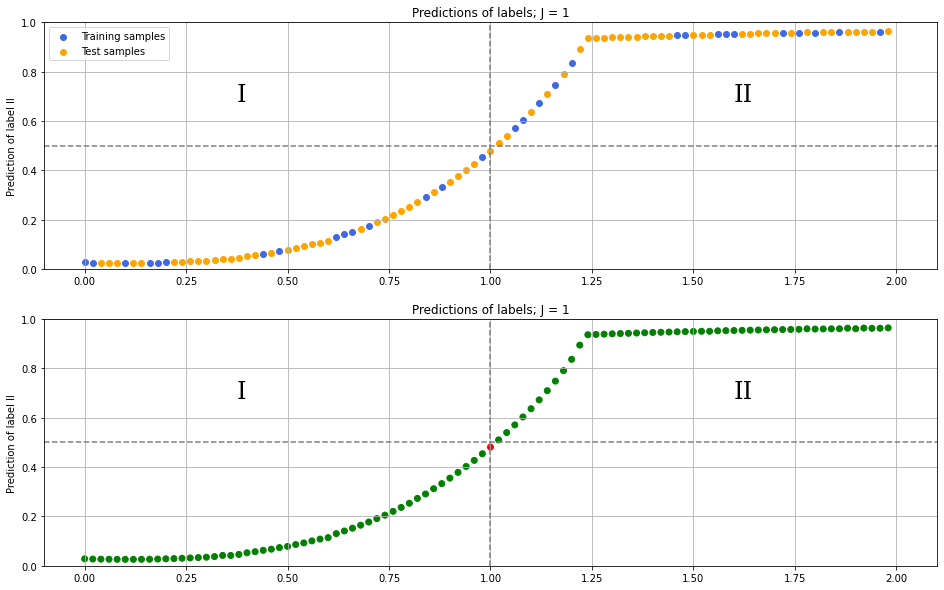

In [8]:
qplt.show_QCNN_classification1D(myqcnn)